In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
# Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

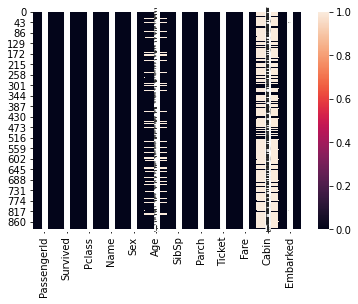

In [7]:
# Using heatmaps for visualization of null values
import seaborn as sns
sns.heatmap(df.isnull(),annot=True)

In [8]:
# We can see that the column-Cabin has very high number of null values, hence we drop that column
df.drop("Cabin",axis=1,inplace=True) 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


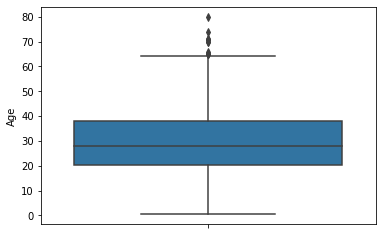

In [9]:
# cheking he age column for outliers using boxplot
sns.boxplot(df["Age"],orient='v')
# The age column has outliers => we use median to replace null values

In [10]:
# replacing null values in Age column with its median
df["Age"] = df["Age"].replace(np.nan,df['Age'].median())

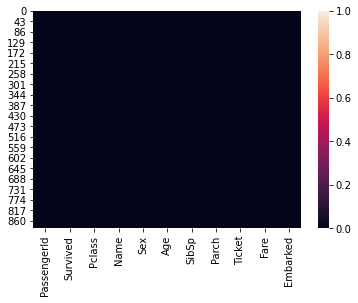

In [11]:
sns.heatmap(df.isnull())
# no null values

In [12]:
# Converting categorical to numerical data
df.head()
# Here the columns-Sex and Embarked can be converted into numberical data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
male =pd.get_dummies(df["Sex"],drop_first=True) 
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [14]:
df = pd.concat([df,male],axis =1)
df.drop("Sex",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [15]:
# using label encoder for Embarked column as it has more than two categories

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df['Embarked']= label_encoder.fit_transform(df['Embarked'].astype(str)) 
# astype(str) is used coz we are converting from string to numerical

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,1


In [16]:
# Correlation
df = df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked','male','Survived']]
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
0,1,3,22.0,1,0,7.2500,2,1,0
1,2,1,38.0,1,0,71.2833,0,0,1
2,3,3,26.0,0,0,7.9250,2,0,1
3,4,1,35.0,1,0,53.1000,2,0,1
4,5,3,35.0,0,0,8.0500,2,1,0


In [17]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
PassengerId,1.000000,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.013083,0.042939,-0.005007
Pclass,-0.035144,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.157112,0.131900,-0.338481
Age,0.034212,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.014205,0.081163,-0.064910
SibSp,-0.057527,0.083081,-0.233296,1.000000,0.414838,0.159651,0.066654,-0.114631,-0.035322
Parch,-0.001652,0.018443,-0.172482,0.414838,1.000000,0.216225,0.038322,-0.245489,0.081629
Fare,0.012658,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.221226,-0.182333,0.257307
Embarked,0.013083,0.157112,-0.014205,0.066654,0.038322,-0.221226,1.000000,0.104057,-0.163517
male,0.042939,0.131900,0.081163,-0.114631,-0.245489,-0.182333,0.104057,1.000000,-0.543351
Survived,-0.005007,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.163517,-0.543351,1.000000


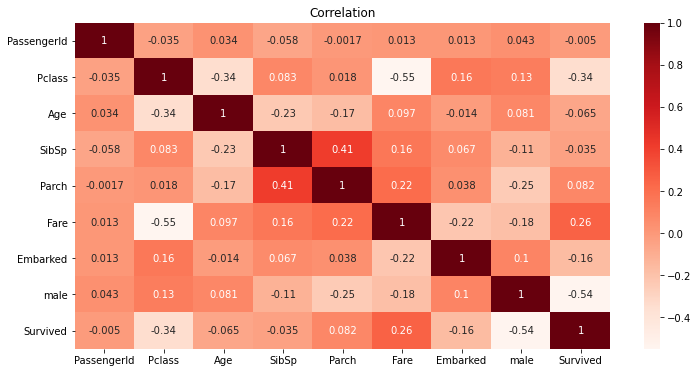

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Reds')

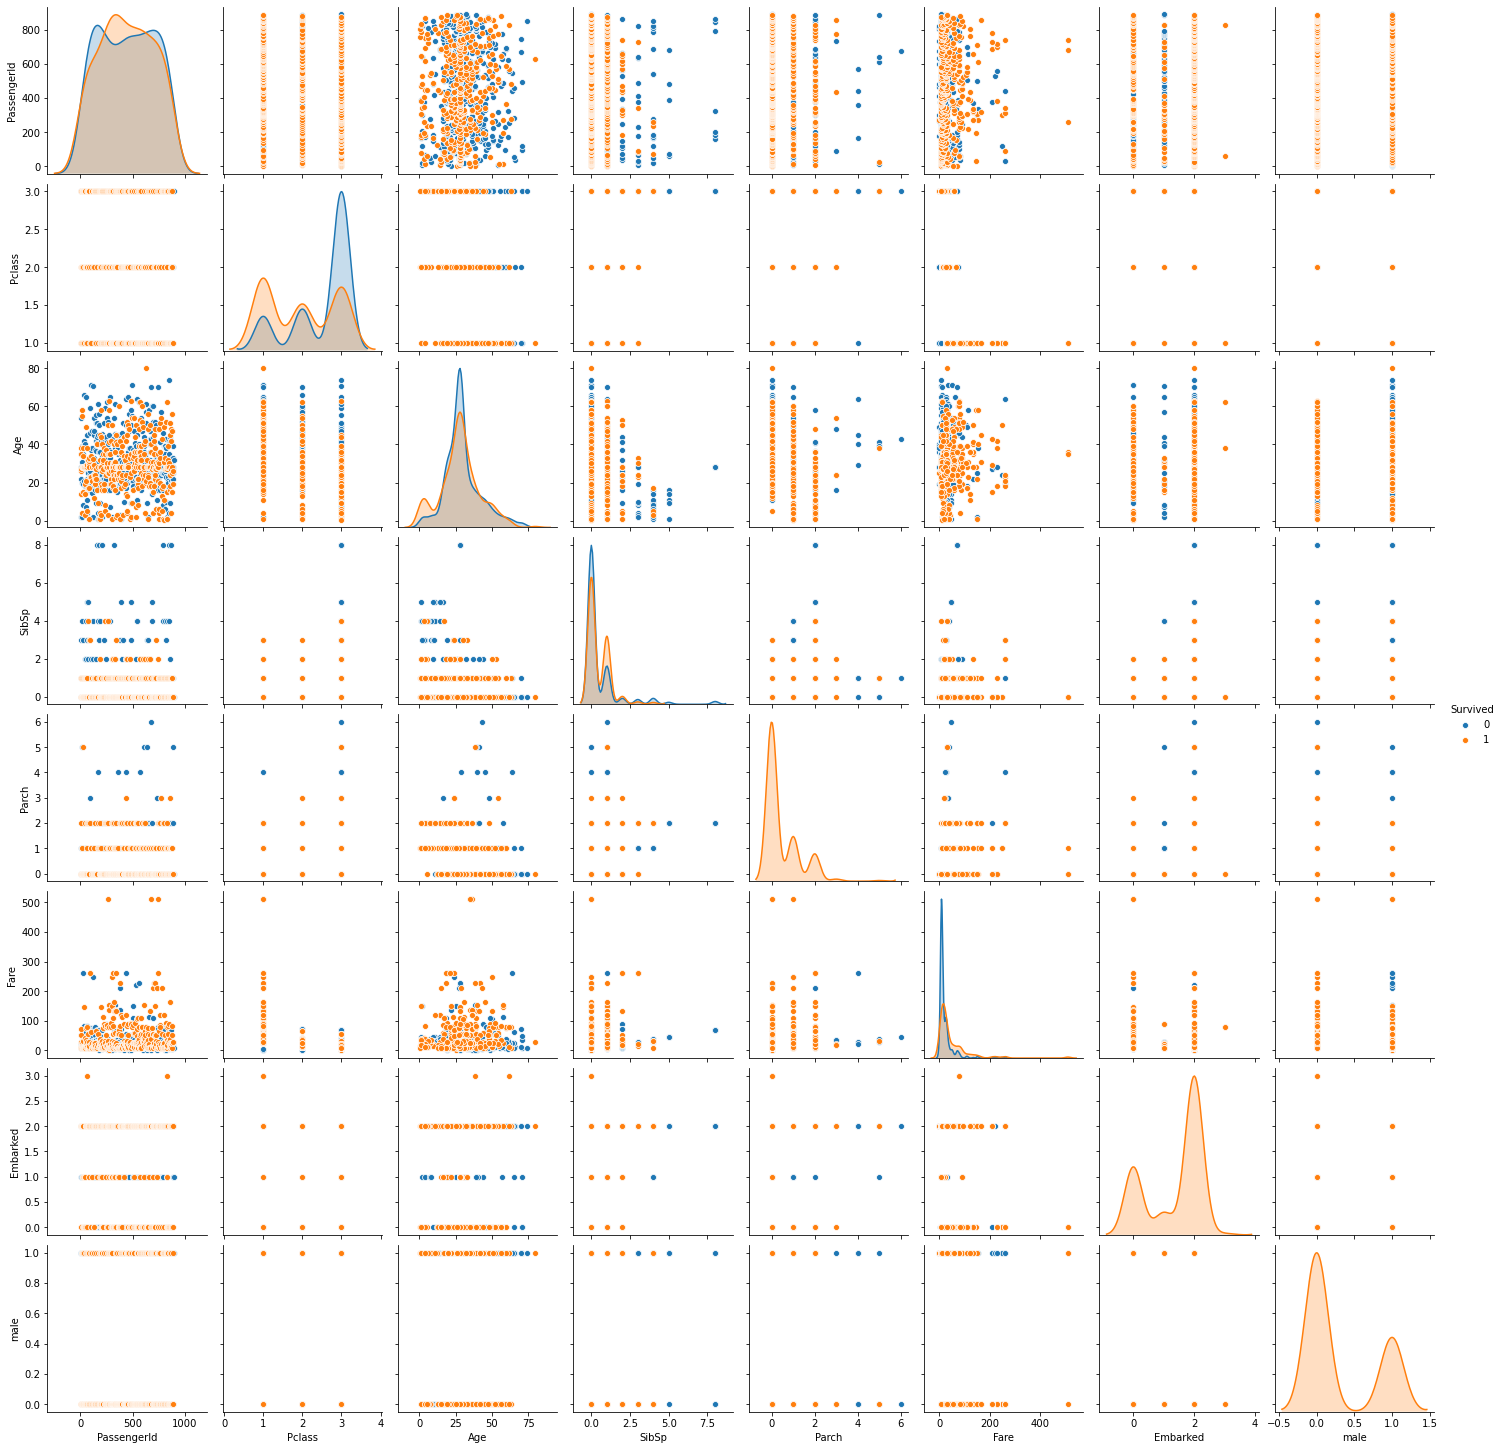

In [19]:
sns.pairplot(df,hue ='Survived')
# overlapping btw the 0 and 1 in survived => logistic regression is not useful

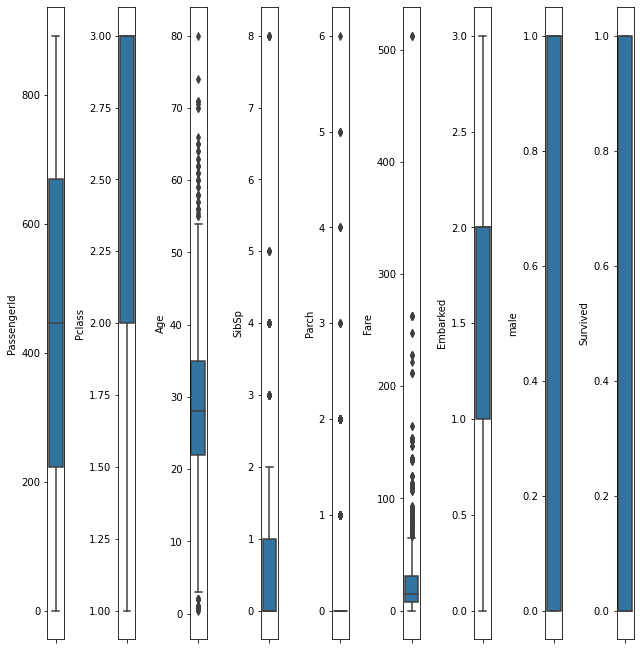

In [20]:
# Checking for outliers

collist = df.columns.values
ncol = 9
nrows = 5

plt.figure(figsize=(ncol,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()
    

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
0,1,3,22.0,1,0,7.2500,2,1,0
1,2,1,38.0,1,0,71.2833,0,0,1
2,3,3,26.0,0,0,7.9250,2,0,1
3,4,1,35.0,1,0,53.1000,2,0,1
4,5,3,35.0,0,0,8.0500,2,1,0


In [22]:
df.shape

(891, 9)

In [23]:
df_new.shape

(820, 9)

In [24]:
df = df_new

In [25]:
# Skewness
df.skew()

PassengerId    0.003454
Pclass        -0.632242
Age            0.401952
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.257511
male          -0.664152
Survived       0.450825
dtype: float64

In [26]:
# Some columns are highly skewed we use log trnsform to reduce the skewness

for col in df[['Parch','Fare','SibSp']]:
    df[col]=np.log1p(df[col])

In [27]:
df.skew()

PassengerId    0.003454
Pclass        -0.632242
Age            0.401952
SibSp          1.292829
Parch          1.832391
Fare           0.196364
Embarked      -1.257511
male          -0.664152
Survived       0.450825
dtype: float64

In [28]:
x = df.drop('Survived',axis=1)
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,3,22.0,0.693147,0.000000,2.110213,2,1
1,2,1,38.0,0.693147,0.000000,4.280593,0,0
2,3,3,26.0,0.000000,0.000000,2.188856,2,0
3,4,1,35.0,0.693147,0.000000,3.990834,2,0
4,5,3,35.0,0.000000,0.000000,2.202765,2,1
...,...,...,...,...,...,...,...,...
886,887,2,27.0,0.000000,0.000000,2.639057,2,1
887,888,1,19.0,0.000000,0.000000,3.433987,2,0
888,889,3,28.0,0.693147,1.098612,3.196630,2,0
889,890,1,26.0,0.000000,0.000000,3.433987,0,1


In [29]:
y = df[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [30]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler
x["Embarked"] = x["Embarked"]+1
sc = StandardScaler()
x = sc.fit_transform(x)

In [31]:
x = pd.DataFrame(x)
x.columns = ['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked','Male']
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,-1.743605,0.833995,-0.611926,1.289936,-0.469469,-0.839435,0.577898,0.722036
1,-1.739685,-1.586804,0.703210,1.289936,-0.469469,1.584199,-1.949444,-1.384973
2,-1.735764,0.833995,-0.283142,-0.607791,-0.469469,-0.751615,0.577898,-1.384973
3,-1.731843,-1.586804,0.456622,1.289936,-0.469469,1.260629,0.577898,-1.384973
4,-1.727923,0.833995,0.456622,-0.607791,-0.469469,-0.736084,0.577898,0.722036


In [32]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [35]:
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.7759146341463414
accuracy score of LogisticRegression() is
0.823170731707317
[[87 13]
 [16 48]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       100
           1       0.79      0.75      0.77        64

    accuracy                           0.82       164
   macro avg       0.82      0.81      0.81       164
weighted avg       0.82      0.82      0.82       164



0.7774390243902439
accuracy score of GaussianNB() is
0.8109756097560976
[[84 16]
 [15 49]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       100
           1       0.75      0.77      0.76        64

    accuracy                           0.81       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.81      0.81      0.81       164



0.8384146341463414
accuracy score of SVC() is
0.8414634146341463
[[89 11]
 [15 49]]
              precision    recall  f1-score   support

           0  

In [36]:
# Ensemble techniques

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print("accuracy score",accuracy_score(y_test,predrf))
print("confusion matrix",confusion_matrix(y_test,predrf))
print("classification_report",classification_report(y_test,predrf))

accuracy score 0.8536585365853658
confusion matrix [[91  9]
 [15 49]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.91      0.88       100
           1       0.84      0.77      0.80        64

    accuracy                           0.85       164
   macro avg       0.85      0.84      0.84       164
weighted avg       0.85      0.85      0.85       164



In [37]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()
# default test_estimator = decision tree, n_estimators = 50, learning_rate = 1, algorithm = SAMME.R
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print("accuracy score",accuracy_score(y_test,predad))
print("confusion matrix",confusion_matrix(y_test,predad))
print("classification_report",classification_report(y_test,predad))

accuracy score 0.823170731707317
confusion matrix [[86 14]
 [15 49]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.86      0.86       100
           1       0.78      0.77      0.77        64

    accuracy                           0.82       164
   macro avg       0.81      0.81      0.81       164
weighted avg       0.82      0.82      0.82       164



In [38]:
# cross_val_score

from sklearn.model_selection import cross_val_score

model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),rf]

for m in model:
    print("For",m ,cross_val_score(m,x,y,cv=10).mean())

For LogisticRegression() 0.7792682926829269
For GaussianNB() 0.7804878048780488
For SVC() 0.8121951219512196
For DecisionTreeClassifier() 0.7158536585365853
For KNeighborsClassifier() 0.7987804878048781
For RandomForestClassifier() 0.7829268292682927


In [42]:
# Saving the model - rf

import joblib

joblib.dump(rf,"rf_titanic.pkl")

['rf_titanic.pkl']